In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.stats.multitest as multi
import re
import dataframe_image as dfi
from statannotations.Annotator import Annotator
from  matplotlib.ticker import FuncFormatter
sys.path.append('/home/felix/jupyter/jupyter_notebooks/functions')

In [2]:
import ms_analysis as ms

In [3]:
sl_raw, sl_raw_sub, sl_log2, sl_log2_sub, sl_log2_boxplots, sl_rank_plot, sl_rank_secr, sl_fract_plot, sl_int_plot, sl_log2_norm, sl_pca = ms.ISs_data_processing('sl', '/home/felix/thesis/chapter2_tomato_ISs/Results/3_Tomato_ISs/proteomics/no_conc_correction/sl_ACE_0428_MQ11_proteinGroups_renamed.tsv', 'LFQ_intensity_AF', 3, '/home/felix/thesis/chapter2_tomato_ISs/Results/3_Tomato_ISs/secretomes/solgenomics_Slycopersicum_ITAG4.0_secretion.tsv')
speru_raw, speru_raw_sub, speru_log2, speru_log2_sub, speru_log2_boxplots, speru_rank_plot, speru_rank_secr, speru_fract_plot, speru_int_plot, speru_log2_norm, speru_pca = ms.ISs_data_processing('speru', '/home/felix/thesis/chapter2_tomato_ISs/Results/3_Tomato_ISs/proteomics/no_conc_correction/speru_ACE_0557_MQ06_proteinGroups_renamed.tsv', 'LFQ_intensity_AF', 3, '/home/felix/thesis/chapter2_tomato_ISs/Results/3_Tomato_ISs/secretomes/Speruvianum_GCA_PROT_slyc_noX_secretion.tsv')
spen_raw, spen_raw_sub, spen_log2, spen_log2_sub, spen_log2_boxplots, spen_rank_plot, spen_rank_secr, spen_fract_plot, spen_int_plot, spen_log2_norm, spen_pca = ms.ISs_data_processing('spen', '/home/felix/thesis/chapter2_tomato_ISs/Results/3_Tomato_ISs/proteomics/no_conc_correction/spenn_ACE_0557_MQ05_proteinGroups_renamed.tsv', 'LFQ_intensity_AF', 3, '/home/felix/thesis/chapter2_tomato_ISs/Results/3_Tomato_ISs/secretomes/GCF_001406875.1_SPENNV200_protein_ids_secretion.tsv')

/home/felix/jupyter/jupyter_notebooks/functions/ms_analysis.py:67: RuntimeWarning: divide by zero encountered in log2
  data = np.log2(data)
/home/felix/jupyter/jupyter_notebooks/functions/ms_analysis.py:67: RuntimeWarning: divide by zero encountered in log2
  data = np.log2(data)
/home/felix/jupyter/jupyter_notebooks/functions/ms_analysis.py:67: RuntimeWarning: divide by zero encountered in log2
  data = np.log2(data)


## Overview of MS data

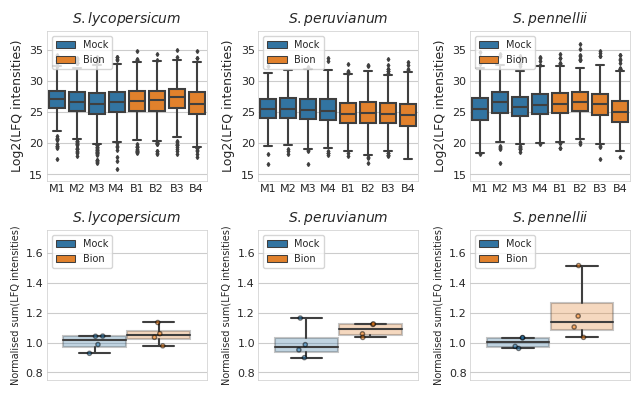

In [4]:
sns.set_style("whitegrid")

def annotate_axes(axes_list):
    for i, ax in enumerate(axes_list):
        ax.tick_params(axis='both', labelsize=8, pad=0.5)
        # change all spines
        for axis in ['top','bottom','left','right']:
            ax.spines[axis].set_linewidth(0.5)
        ax.xaxis.set_tick_params(width=1, length=2)
        ax.yaxis.set_tick_params(which='minor', width=0.25, length=2)
        ax.yaxis.set_tick_params(which='major', width=0.5, length=2)


figure = plt.figure(figsize=(6.5, 4))

raw_boxL = plt.subplot2grid((2, 6), (0, 0), colspan=2)
raw_boxR = plt.subplot2grid((2, 6), (0, 2), colspan=2)
raw_boxS = plt.subplot2grid((2, 6), (0, 4), colspan=2)


raw_LFQL = plt.subplot2grid((2, 6), (1, 0), colspan=2)
raw_LFQR = plt.subplot2grid((2, 6), (1, 2), colspan=2)
raw_LFQS = plt.subplot2grid((2, 6), (1, 4), colspan=2)


axes = [raw_boxL, raw_boxR, raw_boxS, raw_LFQL, raw_LFQR, raw_LFQS]
annotate_axes(axes)

### Define some arrays ###

boxplots = [raw_boxL, raw_boxR, raw_boxS]
boxplots_spec = ['$\it{S.lycopersicum}$', '$\it{S.peruvianum}$', '$\it{S.pennellii}$']
#boxplots_spec = ['S.lycopersicum', 'S.peruvianum', 'S.pennellii']

sl_order = ['LFQ_intensity_AF_W_11', 'LFQ_intensity_AF_W_12', 'LFQ_intensity_AF_W_13', 'LFQ_intensity_AF_W_14', 'LFQ_intensity_AF_B_16', 'LFQ_intensity_AF_B_17', 'LFQ_intensity_AF_B_18', 'LFQ_intensity_AF_B_19']
speru_order = ['LFQ_intensity_AF_W_01', 'LFQ_intensity_AF_W_02', 'LFQ_intensity_AF_W_03', 'LFQ_intensity_AF_W_04', 'LFQ_intensity_AF_B_06', 'LFQ_intensity_AF_B_07', 'LFQ_intensity_AF_B_08', 'LFQ_intensity_AF_B_09']
box_labels = ['M1', 'M2', 'M3', 'M4', 'B1', 'B2', 'B3', 'B4']
raw_LFQ = [raw_LFQL, raw_LFQR, raw_LFQS]
#ranks = [rank_slM, rank_slB, rank_prM, rank_prB, rank_pnM, rank_pnB]

### Generate individual plots ###



# Tomato histograms

for i in boxplots:
    i.set_ylim(14, 38)

sns.boxplot(data=sl_log2_boxplots[sl_log2_boxplots.log2_LFQ_intensity != 0], x='sample', y='log2_LFQ_intensity', hue='treatment', dodge=False, order=sl_order, flierprops = dict(markersize = 2), ax=raw_boxL)
sns.boxplot(data=speru_log2_boxplots[speru_log2_boxplots.log2_LFQ_intensity != 0], x='sample', y='log2_LFQ_intensity', hue='treatment', dodge=False,  order=speru_order, hue_order=['Mock', 'Bion'], flierprops = dict(markersize = 2), ax=raw_boxR)
sns.boxplot(data=spen_log2_boxplots[spen_log2_boxplots.log2_LFQ_intensity != 0], x='sample', y='log2_LFQ_intensity', hue='treatment', dodge=False, order=sl_order, hue_order=['Mock', 'Bion'], flierprops = dict(markersize = 2), ax=raw_boxS)

handles, labels = raw_boxL.get_legend_handles_labels()
raw_boxL.legend(handles[:2], ['Mock', 'Bion'], ncol=1, loc=2, prop={"size":7}, markerscale=0.5)
raw_boxR.legend(handles[:2], ['Mock', 'Bion'], ncol=1, loc=2, prop={"size":7}, markerscale=0.5)
raw_boxS.legend(handles[:2], ['Mock', 'Bion'], ncol=1, loc=2, prop={"size":7}, markerscale=0.5)

for i, spec in zip(boxplots, boxplots_spec):
    i.set_xticklabels(box_labels, size=8)
    i.set_title(spec, fontsize=10)
    i.set_xlabel('')
    i.set_ylabel('Log2(LFQ intensities)', fontsize=9)


# Slyc, Speru and Spen Total Intensities


sns.boxplot(data=sl_int_plot, x='species', y='total_LFQ_intensity_normalised', hue='treatment', boxprops={'alpha':0.3}, ax=raw_LFQL)
sns.stripplot(data=sl_int_plot, x='species', y='total_LFQ_intensity_normalised', hue='treatment', size=3, dodge=True, alpha=0.5, edgecolor='black', linewidth=1, ax=raw_LFQL)
sns.boxplot(data=speru_int_plot, x='species', y='total_LFQ_intensity_normalised', hue='treatment', boxprops={'alpha':0.3}, ax=raw_LFQR)
sns.stripplot(data=speru_int_plot, x='species', y='total_LFQ_intensity_normalised', hue='treatment', size=3, dodge=True, alpha=0.5, edgecolor='black', linewidth=1, ax=raw_LFQR)
sns.boxplot(data=spen_int_plot, x='species', y='total_LFQ_intensity_normalised', hue='treatment', boxprops={'alpha':0.3}, ax=raw_LFQS)
sns.stripplot(data=spen_int_plot, x='species', y='total_LFQ_intensity_normalised', hue='treatment', size=3, dodge=True, alpha=0.5, edgecolor='black', linewidth=1, ax=raw_LFQS)


for i, spec in zip(raw_LFQ, boxplots_spec):
    i.set_ylim(0.75, 1.75)
    i.set_title(spec, fontsize=10)
    i.set_xlabel('')
    i.set_xticklabels('')
    i.set_ylabel('Normalised sum(LFQ intensities)', fontsize=7)
    
    handles, labels = i.get_legend_handles_labels()
    i.legend(handles[:2], labels[:2], loc=2, prop={"size":7}, markerscale=0.5)


#spen.set_xlabel('')
#spen.set_ylabel('Normalised Area', fontsize=6)
#spen.tick_params(axis='y', labelsize=6)
#spen.set_xticklabels(sample_labels, size=5)

#handles, labels = spen.get_legend_handles_labels()
#spen.legend(handles[:2], ['Mock', 'BTH'], ncol=1, loc=2, prop={"size":5.5}, markerscale=0.5)


plt.tight_layout()
#plt.tight_layout(pad=0.75, h_pad=0.001)
#plt.savefig('/home/felix/thesis/chapter2_tomato_ISs/Results/3_Tomato_ISs/corrections/Figure6_jupyter_update.svg', transparent=True)
plt.show()

## Centering of data w/ and w/o correcting for variation

In [5]:
# Generate dummy data set for normalisation comparison

A_mock = [24.1, 24.4, 23.9, 23.7]
A_bion = [23.8, 24.1, 24.3, 23.8]
B_mock = [20.9, 21.4, 20.7, 21.1]
B_bion = [23.1, 23.3, 22.4, 22.9]
C_mock = [21.1, 21.5, 20.8, 21]
C_bion = [27.1, 27.3, 26.4, 26.9]

mock = [A_mock, B_mock, C_mock]
bion = [A_bion, B_bion, C_bion]

names = ['A', 'B', 'C']

new = []

for arr, name in zip(mock, names):
    for val in arr:
        new.append([name, 'Mock', val])
        
for arr, name in zip(bion, names):
    for val in arr:
        new.append([name, 'Bion', val])
        
raw_vals = pd.DataFrame(new, columns=['Sample', 'Treatment', 'Value'])

In [6]:
# Generate z-score data set for normalisation comparison

A_z = stats.zscore(raw_vals[raw_vals.Sample == 'A'].Value)
B_z = stats.zscore(raw_vals[raw_vals.Sample == 'B'].Value)
C_z = stats.zscore(raw_vals[raw_vals.Sample == 'C'].Value)

mock = [A_z[4:], B_z[4:], C_z[4:]]
bion = [A_z[:4], B_z[:4], C_z[:4]]

names = ['A', 'B', 'C']

new = []

for arr, name in zip(mock, names):
    for val in arr:
        new.append([name, 'Mock', val])
        
for arr, name in zip(bion, names):
    for val in arr:
        new.append([name, 'Bion', val])
        
zsc_vals = pd.DataFrame(new, columns=['Sample', 'Treatment', 'Value'])

In [7]:
# Generate centred, not deviation-corrected data set for normalisation comparison

A_c = raw_vals[raw_vals.Sample == 'A'].Value - np.mean(raw_vals[raw_vals.Sample == 'A'].Value)
B_c = raw_vals[raw_vals.Sample == 'B'].Value - np.mean(raw_vals[raw_vals.Sample == 'B'].Value)
C_c = raw_vals[raw_vals.Sample == 'C'].Value - np.mean(raw_vals[raw_vals.Sample == 'C'].Value)

mock = [A_c[4:], B_c[4:], C_c[4:]]
bion = [A_c[:4], B_c[:4], C_c[:4]]

names = ['A', 'B', 'C']

new = []

for arr, name in zip(mock, names):
    for val in arr:
        new.append([name, 'Mock', val])
        
for arr, name in zip(bion, names):
    for val in arr:
        new.append([name, 'Bion', val])
        
nor_vals = pd.DataFrame(new, columns=['Sample', 'Treatment', 'Value'])

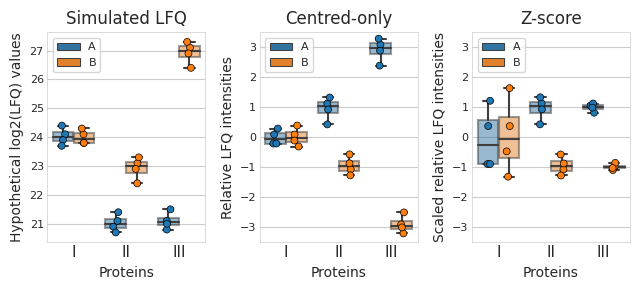

In [8]:
sns.set_style("whitegrid")

def annotate_axes(axes_list):
    for i, ax in enumerate(axes_list):
        ax.tick_params(axis='both', labelsize=8, pad=0.5)
        # change all spines
        for axis in ['top','bottom','left','right']:
            ax.spines[axis].set_linewidth(0.5)
        ax.xaxis.set_tick_params(width=1, length=2)
        ax.yaxis.set_tick_params(which='minor', width=0.25, length=2)
        ax.yaxis.set_tick_params(which='major', width=0.5, length=2)


figure = plt.figure(figsize=(6.5, 3))

dims = (1, 3)

raw = plt.subplot2grid(dims, (0, 0))
nor = plt.subplot2grid(dims, (0, 1))
zsc = plt.subplot2grid(dims, (0, 2))

axes = [raw, nor, zsc]
annotate_axes(axes)

### Define some arrays ###

dfs = [raw_vals, nor_vals, zsc_vals]
titles = ['Simulated LFQ', 'Centred-only', 'Z-score']

### Generate individual plots ###

for df, axe in zip(dfs, axes):
    sns.boxplot(data=df, x='Sample', y='Value', hue='Treatment', dodge=True, boxprops={"alpha":0.5}, ax=axe)
    sns.stripplot(data=df, x='Sample', y='Value', hue='Treatment', dodge=True, edgecolor='black', linewidth=0.5, ax=axe)
    
#sns.stripplot(data=raw_vals, x='Sample', y='Value', hue='Treatment', dodge=True, ax=raw)
#sns.stripplot(data=raw_vals, x='Sample', y='Value', hue='Treatment', dodge=True, ax=raw)

#sns.stripplot(data=nor_vals, x='Sample', y='Value', hue='Treatment', dodge=True, ax=nor)
#sns.stripplot(data=zsc_vals, x='Sample', y='Value', hue='Treatment', dodge=True, ax=zsc)

for ax in [nor, zsc]:
    ax.set_ylim(-3.5, 3.5)
    
for ax, tit in zip(axes, titles):
    ax.set_title(tit, fontsize=12)
    ax.set_xticklabels(['I', 'II','III'], fontsize=11)
    ax.set_xlabel('Proteins')
    if ax == nor:
        ax.set_ylabel('Relative LFQ intensities', fontsize=10)

    elif ax == zsc:
        ax.set_ylabel('Scaled relative LFQ intensities', fontsize=10)
        
    else:
        ax.set_ylabel('Hypothetical log2(LFQ) values', fontsize=10)
                        
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[:2], ['A', 'B'], ncol=1, loc=2, prop={"size":8}, markerscale=0.5)


plt.tight_layout()
#plt.tight_layout(pad=0.75, h_pad=0.001)
#plt.savefig('/home/felix/thesis/chapter2_tomato_ISs/Results/3_Tomato_ISs/corrections/Figure6a_jupyter.svg', transparent=True)
plt.show()

## PCA of tomato MS

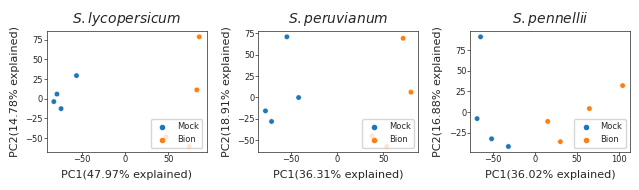

In [9]:
sns.set_style("ticks")

def annotate_axes(axes_list):
    for i, ax in enumerate(axes_list):
        ax.tick_params(axis='both', labelsize=6, pad=0.5)
        # change all spines
        for axis in ['top','bottom','left','right']:
            ax.spines[axis].set_linewidth(0.5)
        ax.xaxis.set_tick_params(width=0.5, length=2)
        ax.yaxis.set_tick_params(which='minor', width=0.25, length=2)
        ax.yaxis.set_tick_params(which='major', width=0.5, length=2)


figure = plt.figure(figsize=(6.5, 2))

pca_sl = plt.subplot2grid((1, 6), (0, 0), colspan=2)
pca_pr = plt.subplot2grid((1, 6), (0, 2), colspan=2)
pca_pn = plt.subplot2grid((1, 6), (0, 4), colspan=2)


axes = [pca_sl, pca_pr, pca_pn]
annotate_axes(axes)

### Define some arrays ###
treat_order = ['W', 'B']
treat_label = ['Mock', 'Bion']

#ranks = [rank_slM, rank_slB, rank_prM, rank_prB, rank_pnM, rank_pnB, rank_sec_slM, rank_sec_slB]


### Generate individual plots ###

# Slyc PCA

sns.scatterplot(data=sl_pca[0], x='PC1', y='PC2', hue='target', hue_order=treat_order, s=15, ax=pca_sl)
pca_sl.axes.set_title('$\it{S.lycopersicum}$', fontsize=10)
pca_sl.set_xlabel('PC1({:.2f}% explained)'.format(sl_pca[1][0]*100), fontsize=8)
pca_sl.set_ylabel('PC2({:.2f}% explained)'.format(sl_pca[1][1]*100), fontsize=8)


# Speru PCA

sns.scatterplot(data=speru_pca[0], x='PC1', y='PC2', hue='target', hue_order=treat_order, s=15, ax=pca_pr)
pca_pr.axes.set_title('$\it{}S.peruvianum}$', fontsize=10)
pca_pr.set_xlabel('PC1({:.2f}% explained)'.format(speru_pca[1][0]*100), fontsize=8)
pca_pr.set_ylabel('PC2({:.2f}% explained)'.format(speru_pca[1][1]*100), fontsize=8)


# Spen PCA

sns.scatterplot(data=spen_pca[0], x='PC1', y='PC2', hue='target', hue_order=treat_order, s=15, ax=pca_pn)
pca_pn.axes.set_title('$\it{S.pennellii}$', fontsize=10)
pca_pn.set_xlabel('PC1({:.2f}% explained)'.format(spen_pca[1][0]*100), fontsize=8)
pca_pn.set_ylabel('PC2({:.2f}% explained)'.format(spen_pca[1][1]*100), fontsize=8)


for i in axes:
    handles, labels = i.get_legend_handles_labels()
    i.legend(handles[:2], treat_label, loc=4, prop={"size":6}, markerscale=0.5)


plt.tight_layout()
#plt.tight_layout(pad=0.75, h_pad=0.001)
#plt.savefig('/home/felix/thesis/chapter2_tomato_ISs/Results/3_Tomato_ISs/Figure7_juptyer.svg', transparent=True)
plt.show()

## Load Orthogroups information

In [10]:
ogs = pd.read_csv('/home/felix/thesis/chapter2_tomato_ISs/Results/3_Tomato_ISs/orthofinder/Orthogroups_all.tsv', engine='python', sep='\t', index_col=0)
ogs = ogs.fillna('empty')
ogs = ogs.drop(columns=['nbenthamianaE_AA_Supplemental_dataset_06'])
ogs.rename(columns={'GCF_001406875.1_SPENNV200_protein':'Spen', 'ITAG4.0_proteins':'Slyc', 'Speruvianum_GCA_PROT_slyc':'Speru'}, inplace=True)

In [11]:
rel_ogs = pd.read_csv('/home/felix/thesis/chapter2_tomato_ISs/Results/3_Tomato_ISs/orthofinder/relevant_orthogroups_noImpute.tsv', sep='\t', index_col=0)
rel_ogs = rel_ogs.fillna('empty')

## Molecular weight of orthogroups

In [12]:
sl_sec = pd.read_csv('/home/felix/thesis/chapter2_tomato_ISs/Results/3_Tomato_ISs/secretomes/solgenomics_Slycopersicum_ITAG4.0_secretion.tsv', sep='\t', index_col=0)
sr_sec = pd.read_csv('/home/felix/thesis/chapter2_tomato_ISs/Results/3_Tomato_ISs/secretomes/Speruvianum_GCA_PROT_slyc_noX_secretion.tsv', sep='\t', index_col=0)
sn_sec = pd.read_csv('/home/felix/thesis/chapter2_tomato_ISs/Results/3_Tomato_ISs/secretomes/GCF_001406875.1_SPENNV200_protein_ids_secretion.tsv', sep='\t', index_col=0)

## Merge into one DF with MW only

df_molw = pd.concat([sl_sec['mol_weight[kDa]'], sr_sec['mol_weight[kDa]'], sn_sec['mol_weight[kDa]']], axis=0)
df_molw_mature = pd.concat([sl_sec['mol_weight_mature[kDa]'], sr_sec['mol_weight_mature[kDa]'], sn_sec['mol_weight_mature[kDa]']], axis=0)
df_molw_mature.dropna(inplace=True)

new = []

for c, og in enumerate(rel_ogs.index):
    prots = []
    for col in rel_ogs.columns:
        if rel_ogs.loc[og, col] != 'empty':
            for prot in rel_ogs.loc[og, col].split(','):
                prots.append(prot)
                
    new.append([og, np.mean(df_molw[df_molw.index.isin(prots)]), np.mean(df_molw_mature[df_molw_mature.index.isin(prots)])])

        
ogs_molw = pd.DataFrame(new, columns=['orthogroup', 'mol_weight_kDa', 'mol_weight_mature_kDa'])
ogs_molw.index = ogs_molw['orthogroup']
ogs_molw.drop(columns=['orthogroup'], inplace=True)

for og in ogs_molw.index:
    if np.isnan(ogs_molw.loc[og, 'mol_weight_mature_kDa']) == True:
        mw = ogs_molw.loc[og, 'mol_weight_kDa']
        ogs_molw.loc[og, 'mol_weight_mature_kDa'] = mw

In [13]:
## Combine MS data in OGs

change_names = {'LFQ_intensity_AF_W_11':'W1', 'LFQ_intensity_AF_W_11_imputed':'WI1', 'LFQ_intensity_AF_W_12':'W2', 'LFQ_intensity_AF_W_12_imputed':'WI2', 'LFQ_intensity_AF_W_13':'W3', 'LFQ_intensity_AF_W_13_imputed':'WI3', 'LFQ_intensity_AF_W_14':'W4', 'LFQ_intensity_AF_W_14_imputed':'WI4', 'LFQ_intensity_AF_B_16':'B1', 'LFQ_intensity_AF_B_16_imputed':'BI1', 'LFQ_intensity_AF_B_17':'B2', 'LFQ_intensity_AF_B_17_imputed':'BI2', 'LFQ_intensity_AF_B_18':'B3', 'LFQ_intensity_AF_B_18_imputed':'BI3', 'LFQ_intensity_AF_B_19':'B4', 'LFQ_intensity_AF_B_19_imputed':'BI4'}
slyc_ogs, slyc_ogs_log2 = ms.og_replicate_intensities(rel_ogs, 'slyc', ms.linearise_ms(sl_raw_sub[sl_raw_sub.predicted_secretion == True]), change_names, 4)
slyc_ogs_norm = ms.og_bion_water_mean_score(slyc_ogs_log2)
#slyc_ogs_norm = og_bion_water_zscore(slyc_ogs_log2)
slyc_ogs_norm.index = ('Slyc_W1', 'Slyc_W2', 'Slyc_W3', 'Slyc_W4', 'Slyc_B1', 'Slyc_B2', 'Slyc_B3', 'Slyc_B4')
#slyc_pca.index = ('Mock', 'Mock', 'Mock', 'Mock', 'BTH', 'BTH', 'BTH', 'BTH')
slyc_ogs_pca_final, slyc_ogs_pca_explain = ms.og_pca_ms(slyc_ogs_norm, 3)


change_names = {'LFQ_intensity_AF_W_01':'W1', 'LFQ_intensity_AF_W_01_imputed':'WI1', 'LFQ_intensity_AF_W_02':'W2', 'LFQ_intensity_AF_W_02_imputed':'WI2', 'LFQ_intensity_AF_W_03':'W3', 'LFQ_intensity_AF_W_03_imputed':'WI3', 'LFQ_intensity_AF_W_04':'W4', 'LFQ_intensity_AF_W_04_imputed':'WI4', 'LFQ_intensity_AF_B_06':'B1', 'LFQ_intensity_AF_B_06_imputed':'BI1', 'LFQ_intensity_AF_B_07':'B2', 'LFQ_intensity_AF_B_07_imputed':'BI2', 'LFQ_intensity_AF_B_08':'B3', 'LFQ_intensity_AF_B_08_imputed':'BI3', 'LFQ_intensity_AF_B_09':'B4', 'LFQ_intensity_AF_B_09_imputed':'BI4'}
speru_ogs, speru_ogs_log2 = ms.og_replicate_intensities(rel_ogs, 'speru', ms.linearise_ms(speru_raw_sub[speru_raw_sub.predicted_secretion == True]), change_names, 4)
speru_ogs_norm = ms.og_bion_water_mean_score(speru_ogs_log2)
#speru_ogs_norm = og_bion_water_zscore(speru_ogs_log2)
speru_ogs_norm.index = ('Speru_W1', 'Speru_W2', 'Speru_W3', 'Speru_W4', 'Speru_B1', 'Speru_B2', 'Speru_B3', 'Speru_B4')
#speru_pca.index = ('Mock', 'Mock', 'Mock', 'Mock', 'BTH', 'BTH', 'BTH', 'BTH')
speru_ogs_pca_final, speru_ogs_pca_explain = ms.og_pca_ms(speru_ogs_norm, 3)

change_names = {'LFQ_intensity_AF_W_11':'W1', 'LFQ_intensity_AF_W_11_imputed':'WI1', 'LFQ_intensity_AF_W_12':'W2', 'LFQ_intensity_AF_W_12_imputed':'WI2', 'LFQ_intensity_AF_W_13':'W3', 'LFQ_intensity_AF_W_13_imputed':'WI3', 'LFQ_intensity_AF_W_14':'W4', 'LFQ_intensity_AF_W_14_imputed':'WI4', 'LFQ_intensity_AF_B_16':'B1', 'LFQ_intensity_AF_B_16_imputed':'BI1', 'LFQ_intensity_AF_B_17':'B2', 'LFQ_intensity_AF_B_17_imputed':'BI2', 'LFQ_intensity_AF_B_18':'B3', 'LFQ_intensity_AF_B_18_imputed':'BI3', 'LFQ_intensity_AF_B_19':'B4', 'LFQ_intensity_AF_B_19_imputed':'BI4'}
spen_ogs, spen_ogs_log2 = ms.og_replicate_intensities(rel_ogs, 'spen', ms.linearise_ms(spen_raw_sub[spen_raw_sub.predicted_secretion == True]), change_names, 4)
spen_ogs_norm = ms.og_bion_water_mean_score(spen_ogs_log2)
#spen_ogs_norm = og_bion_water_zscore(spen_ogs_log2)
spen_ogs_norm.index = ('Spen_W1', 'Spen_W2', 'Spen_W3', 'Spen_W4', 'Spen_B1', 'Spen_B2', 'Spen_B3', 'Spen_B4')
#spen_pca.index = ('Mock', 'Mock', 'Mock', 'Mock', 'BTH', 'BTH', 'BTH', 'BTH')
spen_ogs_pca_final, spen_ogs_pca_explain = ms.og_pca_ms(spen_ogs_norm, 3)

slyc_ogs_log2.index = ('Slyc_W1', 'Slyc_W2', 'Slyc_W3', 'Slyc_W4', 'Slyc_B1', 'Slyc_B2', 'Slyc_B3', 'Slyc_B4')
speru_ogs_log2.index = ('Speru_W1', 'Speru_W2', 'Speru_W3', 'Speru_W4', 'Speru_B1', 'Speru_B2', 'Speru_B3', 'Speru_B4')
spen_ogs_log2.index = ('Spen_W1', 'Spen_W2', 'Spen_W3', 'Spen_W4', 'Spen_B1', 'Spen_B2', 'Spen_B3', 'Spen_B4')


slyc_ogs_log2_comp = slyc_ogs_log2.T
speru_ogs_log2_comp = speru_ogs_log2.T
spen_ogs_log2_comp = spen_ogs_log2.T

slyc_ogs_log2_comp = ms.two_sided_ogs_t_test(slyc_ogs_log2_comp).sort_values(by='log2FC', ascending=False)
#slyc_ogs_log2_comp_change = slyc_ogs_log2_comp[(slyc_ogs_log2_comp.log2FC > 0.9) | ((slyc_ogs_log2_comp.log2FC < 0.9))]
slyc_ogs_log2_comp_change = slyc_ogs_log2_comp[(slyc_ogs_log2_comp.log2FC > 0.9)]
slyc_ogs_log2_comp_change = ms.fdr_correction(slyc_ogs_log2_comp_change, 'p_value')
slyc_ogs_log2_comp_change = slyc_ogs_log2_comp_change[slyc_ogs_log2_comp_change.fdr_bh_correction_p_value == True]
slyc_ogs_log2_comp_change = slyc_ogs_log2_comp_change.rename(columns={"log2FC":"Slyc_log2FC"})
slyc_ogs_log2_comp_change = slyc_ogs_log2_comp_change.rename(columns={"bion_mean":"Slyc_bion_mean"})
slyc_ogs_log2_comp_change = slyc_ogs_log2_comp_change.rename(columns={"untransformed_bion_mean":"Slyc_untransformed_bion_mean"})
slyc_ogs_log2_comp_change = slyc_ogs_log2_comp_change.rename(columns={"untransformed_water_mean":"Slyc_untransformed_water_mean"})

speru_ogs_log2_comp = ms.two_sided_ogs_t_test(speru_ogs_log2_comp).sort_values(by='log2FC', ascending=False)
#speru_ogs_log2_comp_change = speru_ogs_log2_comp[(speru_ogs_log2_comp.log2FC > 0.9) | (speru_ogs_log2_comp.log2FC < 0.9)]
speru_ogs_log2_comp_change = speru_ogs_log2_comp[(speru_ogs_log2_comp.log2FC > 0.9)]
speru_ogs_log2_comp_change = ms.fdr_correction(speru_ogs_log2_comp_change, 'p_value')
speru_ogs_log2_comp_change = speru_ogs_log2_comp_change[speru_ogs_log2_comp_change.fdr_bh_correction_p_value == True]
speru_ogs_log2_comp_change = speru_ogs_log2_comp_change.rename(columns={"log2FC":"Speru_log2FC"})
speru_ogs_log2_comp_change = speru_ogs_log2_comp_change.rename(columns={"bion_mean":"Speru_bion_mean"})
speru_ogs_log2_comp_change = speru_ogs_log2_comp_change.rename(columns={"untransformed_bion_mean":"Speru_untransformed_bion_mean"})
speru_ogs_log2_comp_change = speru_ogs_log2_comp_change.rename(columns={"untransformed_water_mean":"Speru_untransformed_water_mean"})



spen_ogs_log2_comp = ms.two_sided_ogs_t_test(spen_ogs_log2_comp).sort_values(by='log2FC', ascending=False)
#spen_ogs_log2_comp_change = spen_ogs_log2_comp[(spen_ogs_log2_comp.log2FC > 0.9) | (spen_ogs_log2_comp.log2FC < 0.9)]
spen_ogs_log2_comp_change = spen_ogs_log2_comp[(spen_ogs_log2_comp.log2FC > 0.9)]
spen_ogs_log2_comp_change = ms.fdr_correction(spen_ogs_log2_comp_change, 'p_value')
spen_ogs_log2_comp_change = spen_ogs_log2_comp_change[spen_ogs_log2_comp_change.fdr_bh_correction_p_value == True]
spen_ogs_log2_comp_change = spen_ogs_log2_comp_change.rename(columns={"log2FC":"Spen_log2FC"})
spen_ogs_log2_comp_change = spen_ogs_log2_comp_change.rename(columns={"bion_mean":"Spen_bion_mean"})
spen_ogs_log2_comp_change = spen_ogs_log2_comp_change.rename(columns={"untransformed_bion_mean":"Spen_untransformed_bion_mean"})
spen_ogs_log2_comp_change = spen_ogs_log2_comp_change.rename(columns={"untransformed_water_mean":"Spen_untransformed_water_mean"})

/home/felix/jupyter/jupyter_notebooks/functions/ms_analysis.py:605: RuntimeWarning: divide by zero encountered in log2
  new_log2 = np.log2(new)
/home/felix/jupyter/jupyter_notebooks/functions/ms_analysis.py:605: RuntimeWarning: divide by zero encountered in log2
  new_log2 = np.log2(new)
/home/felix/jupyter/jupyter_notebooks/functions/ms_analysis.py:605: RuntimeWarning: divide by zero encountered in log2
  new_log2 = np.log2(new)
/home/felix/miniconda3/lib/python3.8/site-packages/scipy/stats/_morestats.py:2604: RuntimeWarning: invalid value encountered in double_scalars
  W = numer / denom
/home/felix/miniconda3/lib/python3.8/site-packages/scipy/stats/_morestats.py:2604: RuntimeWarning: invalid value encountered in double_scalars
  W = numer / denom
/home/felix/miniconda3/lib/python3.8/site-packages/scipy/stats/_morestats.py:2604: RuntimeWarning: invalid value encountered in double_scalars
  W = numer / denom


## Analyse shared and unique increased OGs

## Calculate % share of each OG and each replicate

In [14]:
dfs = [slyc_ogs.T, speru_ogs.T, spen_ogs.T]
species = ['sl', 'sr', 'sn']

new = []
new_mean = []

for og in rel_ogs.index:
    for spec, df in zip(species, dfs):
        tmp_m = []
        tmp_b = []
        for col in df.columns:

            tot = np.sum(df[col].to_numpy())
            fra = df.loc[og, col]/tot
            
            if 'W' in col:
                treat = 'Mock'
                tmp_m.append(fra)
                
            elif 'B' in col:
                treat = 'Bion'
                tmp_b.append(fra)
                
            else:
                print('ERROR')

            
            new.append([og, spec, col, treat, fra])
            
        if tmp_m.count(0) < 3:
            tmp_m = [i for i in tmp_m if i != 0]
            
        if tmp_b.count(0) < 3:
            tmp_b = [i for i in tmp_b if i != 0]
            
        new_mean.append([og, spec, 'Mock', np.mean(tmp_m)])
        new_mean.append([og, spec, 'Bion', np.mean(tmp_b)])

imsec_reps = pd.DataFrame(new, columns=['orthogroup', 'species', 'replicate', 'treatment', 'fraction'])
imsec = pd.DataFrame(new_mean, columns=['orthogroup', 'species', 'treatment', 'fraction'])
imsec_mock = imsec[imsec.treatment == 'Mock']
imsec_mock.index = imsec_mock['orthogroup']
imsec_mock.drop(columns=['orthogroup'], inplace=True)
imsec = imsec[imsec.treatment == 'Bion']
imsec.index = imsec['orthogroup']
imsec.drop(columns=['orthogroup'], inplace=True)

/home/felix/.local/lib/python3.8/site-packages/pandas/core/frame.py:4162: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


## Import functional annotations of GOs

In [15]:
fa_par = pd.read_csv('/home/felix/thesis/chapter2_tomato_ISs/Results/3_Tomato_ISs/orthofinder/corrections/pareto_ogs_functional_annotation_fa.tsv.csv', sep='\t', index_col=0)
fa_inc = pd.read_csv('/home/felix/thesis/chapter2_tomato_ISs/Results/3_Tomato_ISs/orthofinder/orthogroups_annotated.tsv', sep='\t', index_col=0)

In [16]:
sl_heat = ms.heatmap_df(imsec_reps, 'sl', slyc_ogs_log2_comp_change, slyc_ogs_log2_comp, ogs_molw, fa_par, fa_inc).sort_values(by='B_mean', ascending=False)
sr_heat = ms.heatmap_df(imsec_reps, 'sr', speru_ogs_log2_comp_change, speru_ogs_log2_comp, ogs_molw, fa_par, fa_inc).sort_values(by='B_mean', ascending=False)
sn_heat = ms.heatmap_df(imsec_reps, 'sn', spen_ogs_log2_comp_change, spen_ogs_log2_comp, ogs_molw, fa_par, fa_inc).sort_values(by='B_mean', ascending=False)

## Make heatmap for most abundant proteins

In [17]:
top_ogs = []

for dfs in [sl_heat, sr_heat, sn_heat]:
    [top_ogs.append(x) for x in dfs.head(10).index]
    
top_ogs = np.unique(top_ogs)

In [18]:
log2fc = []
pshare = []

for og in top_ogs:

    mw = float("{:.1f}".format(sl_heat.loc[og, 'molecular_weight_kDa']))
    
    fa = sl_heat.loc[og, 'functional_annotation']
    
    sl_log2fc = float("{:.2f}".format(sl_heat.loc[og, 'log2FC']))
    sr_log2fc = float("{:.2f}".format(sr_heat.loc[og, 'log2FC']))
    sn_log2fc = float("{:.2f}".format(sn_heat.loc[og, 'log2FC']))
    
    sl_pshare = float("{:.2f}".format(sl_heat.loc[og, 'B_mean']*100))
    sr_pshare = float("{:.2f}".format(sr_heat.loc[og, 'B_mean']*100))
    sn_pshare = float("{:.2f}".format(sn_heat.loc[og, 'B_mean']*100))
#    sr_pshare = sr_heat.loc[og, 'B_mean']*100
#    sn_pshare = sn_heat.loc[og, 'B_mean']*100
    
    pshare.append([og, mw, fa, sl_pshare, sr_pshare, sn_pshare])
    log2fc.append([og, mw, fa, sl_log2fc, sr_log2fc, sn_log2fc])
    
hi_pshare = pd.DataFrame(pshare, columns=['orthogroups', 'mol_weight', 'functional_annotation', 'Sl_share', 'Sr_share', 'Sn_share'])
hi_log2fc = pd.DataFrame(log2fc, columns=['orthogroups', 'mol_weight', 'functional_annotation', 'Sl_log2fc', 'Sr_log2fc', 'Sn_log2fc'])

In [19]:
hi_heat_share = hi_pshare.copy()
hi_heat_share.sort_values(by='mol_weight', ascending=False, inplace=True)
hi_heat_share.set_index('mol_weight', inplace=True)
hi_heat_share.drop(columns=['orthogroups', 'functional_annotation'], inplace=True)

hi_heat_log2fc = hi_log2fc.copy()
hi_heat_log2fc.sort_values(by='mol_weight', ascending=False, inplace=True)
hi_heat_log2fc.set_index('mol_weight', inplace=True)
hi_heat_log2fc.drop(columns=['orthogroups', 'functional_annotation'], inplace=True)

In [20]:
hi_heat_log2fc.replace(-float('Inf'), 0, inplace=True)

## Make heatmap for all proteins annotated as PR proteins

In [21]:
pr_ogs = []

for df in [sl_heat, sr_heat, sn_heat]:
    [pr_ogs.append(x) for x in df[(df.PR == True) & (df.sign_incr)].index]

pr_ogs = np.unique(pr_ogs)

In [22]:
log2fc = []
pshare = []

for og in pr_ogs:

    mw = float("{:.1f}".format(sl_heat.loc[og, 'molecular_weight_kDa']))
    
    fa = sl_heat.loc[og, 'functional_annotation']
    
    sl_log2fc = sl_heat.loc[og, 'log2FC']
    sr_log2fc = sr_heat.loc[og, 'log2FC']
    sn_log2fc = sn_heat.loc[og, 'log2FC']
    
    sl_pshare = float("{:.1f}".format(sl_heat.loc[og, 'B_mean']*100))
    sr_pshare = float("{:.1f}".format(sr_heat.loc[og, 'B_mean']*100))
    sn_pshare = float("{:.1f}".format(sn_heat.loc[og, 'B_mean']*100))
    
    pshare.append([og, mw, fa, sl_pshare, sr_pshare, sn_pshare])
    log2fc.append([og, mw, fa, sl_log2fc, sr_log2fc, sn_log2fc])
    
pr_pshare = pd.DataFrame(pshare, columns=['orthogroups', 'mol_weight', 'functional_annotation', 'Sl_share', 'Sr_share', 'Sn_share'])
pr_log2fc = pd.DataFrame(log2fc, columns=['orthogroups', 'mol_weight', 'functional_annotation', 'Sl_log2fc', 'Sr_log2fc', 'Sn_log2fc'])

In [23]:
pr_heat_share = pr_pshare.copy()
pr_heat_share.sort_values(by='mol_weight', ascending=False, inplace=True)
pr_heat_share.set_index('mol_weight', inplace=True)
pr_heat_share.drop(columns=['orthogroups', 'functional_annotation'], inplace=True)

pr_heat_log2fc = pr_log2fc.copy()
pr_heat_log2fc.sort_values(by='mol_weight', ascending=False, inplace=True)
pr_heat_log2fc.set_index('mol_weight', inplace=True)
pr_heat_log2fc.drop(columns=['orthogroups', 'functional_annotation'], inplace=True)

In [24]:
pr_heat_log2fc.replace(float('Inf'), 4, inplace=True)

In [25]:
hi_heat_log2fc

,Sl_log2fc,Sr_log2fc,Sn_log2fc
mol_weight,,,
113.4,-0.42,0.47,0.05
93.4,0.67,-0.22,0.82
80.7,0.00,-1.56,-0.89
78.6,-0.60,-0.12,-0.26
77.8,-0.70,0.54,0.79
76.5,0.97,1.57,1.89
76.4,0.00,0.25,-0.93
71.6,0.22,-0.70,-0.91
59.3,0.30,-0.41,-0.11


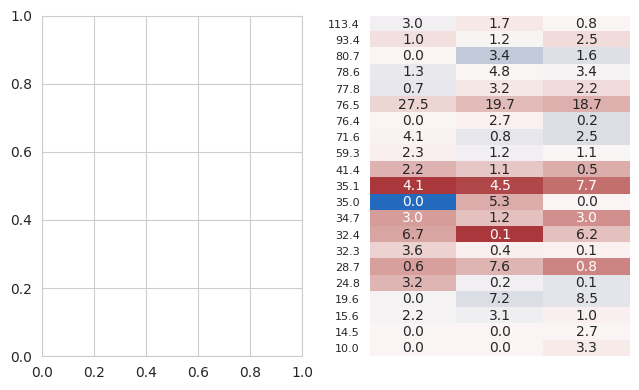

In [26]:
sns.set_style("whitegrid")

def annotate_axes(axes_list):
    for i, ax in enumerate(axes_list):
        ax.tick_params(axis='both', labelsize=8, pad=0.5)
        # change all spines
        for axis in ['top','bottom','left','right']:
            ax.spines[axis].set_linewidth(0.5)
        ax.xaxis.set_tick_params(width=1, length=2)
        ax.yaxis.set_tick_params(which='minor', width=0.25, length=2)
        ax.yaxis.set_tick_params(which='major', width=0.5, length=2)


figure = plt.figure(figsize=(6.5, 4))

dims = (1, 4)

gels = plt.subplot2grid(dims, (0, 0), colspan=2)
hi_heat = plt.subplot2grid(dims, (0, 2), colspan=2)
#pr_heat = plt.subplot2grid(dims, (0, 3), colspan=1)


axes = [gels, hi_heat]
heatmaps = [hi_heat]


### Define some arrays ###

#boxplots = [raw_boxL, raw_boxR, raw_boxS]
#boxplots_spec = ['$\it{S.lycopersicum}$', '$\it{S.peruvianum}$', '$\it{S.pennellii}$']
#boxplots_spec = ['S.lycopersicum', 'S.peruvianum', 'S.pennellii']

#sl_order = ['LFQ_intensity_AF_W_11', 'LFQ_intensity_AF_W_12', 'LFQ_intensity_AF_W_13', 'LFQ_intensity_AF_W_14', 'LFQ_intensity_AF_B_16', 'LFQ_intensity_AF_B_17', 'LFQ_intensity_AF_B_18', 'LFQ_intensity_AF_B_19']
#speru_order = ['LFQ_intensity_AF_W_01', 'LFQ_intensity_AF_W_02', 'LFQ_intensity_AF_W_03', 'LFQ_intensity_AF_W_04', 'LFQ_intensity_AF_B_06', 'LFQ_intensity_AF_B_07', 'LFQ_intensity_AF_B_08', 'LFQ_intensity_AF_B_09']
#box_labels = ['M1', 'M2', 'M3', 'M4', 'B1', 'B2', 'B3', 'B4']
#raw_LFQ = [raw_LFQL, raw_LFQR, raw_LFQS]
#ranks = [rank_slM, rank_slB, rank_prM, rank_prB, rank_pnM, rank_pnB]

### Generate individual plots ###

sns.heatmap(data=hi_heat_log2fc, annot=hi_heat_share, annot_kws={"size": 10}, fmt=".1f", cmap='vlag', cbar=False, vmin=-5, vmax=5, ax=hi_heat)
#sns.heatmap(data=pr_heat_log2fc, annot=pr_heat_share, annot_kws={"size": 10}, cmap='vlag', cbar=False, vmin=-5, vmax=5, ax=pr_heat)

for hm in heatmaps:
    hm.set_yticklabels(hm.get_yticklabels(), rotation = 0, fontsize = 8)
    hm.set_ylabel('')
    hm.set_xticklabels(['', '', ''])

#pr_heat.set_yticks(rotation=0) 
#pr_heat.set_xticklabels(['Sl', 'Sr', 'Sn'], fontsize=10)



plt.tight_layout()
#plt.tight_layout(pad=0.75, h_pad=0.001)
#plt.savefig('/home/felix/thesis/chapter2_tomato_ISs/Results/3_Tomato_ISs/gel_comparison/corrections/Figure8_heatmaps_jupyter.svg', transparent=True)
plt.show()

In [27]:
pr_pshare.sort_values(by='mol_weight', ascending=False)

,orthogroups,mol_weight,functional_annotation,Sl_share,Sr_share,Sn_share
0,OG0000167,76.5,PR7,27.5,19.7,18.7
4,OG0008609,35.1,PR2,4.1,4.5,7.6
3,OG0003427,34.7,PR2,3.0,1.2,3.0
5,OG0011318,34.0,PR3,0.2,0.0,0.0
8,OG0015230,33.2,PR3,0.2,0.0,0.0
10,OG0017613,32.4,PR9,6.7,0.1,6.2
7,OG0012708,32.3,PR9,3.6,0.4,0.1
12,OG0019023,28.7,PR8,0.6,7.6,0.8
14,OG0022181,25.0,PR3,0.7,0.1,0.3
6,OG0011522,24.5,PR14,0.3,0.1,0.3


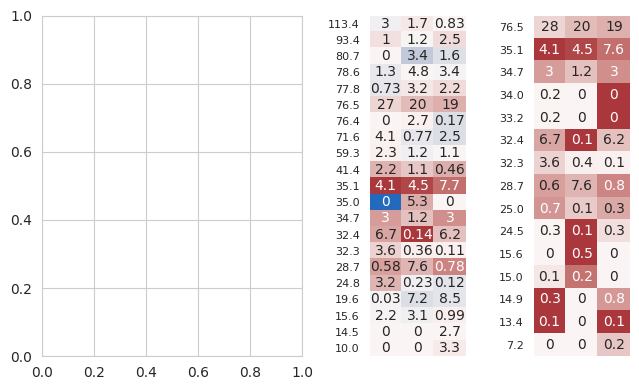

In [39]:
sns.set_style("whitegrid")

def annotate_axes(axes_list):
    for i, ax in enumerate(axes_list):
        ax.tick_params(axis='both', labelsize=8, pad=0.5)
        # change all spines
        for axis in ['top','bottom','left','right']:
            ax.spines[axis].set_linewidth(0.5)
        ax.xaxis.set_tick_params(width=1, length=2)
        ax.yaxis.set_tick_params(which='minor', width=0.25, length=2)
        ax.yaxis.set_tick_params(which='major', width=0.5, length=2)


figure = plt.figure(figsize=(6.5, 4))

dims = (1, 4)

gels = plt.subplot2grid(dims, (0, 0), colspan=2)
hi_heat = plt.subplot2grid(dims, (0, 2), colspan=1)
pr_heat = plt.subplot2grid(dims, (0, 3), colspan=1)


axes = [gels, hi_heat, pr_heat]
heatmaps = [hi_heat, pr_heat]


### Define some arrays ###

#boxplots = [raw_boxL, raw_boxR, raw_boxS]
#boxplots_spec = ['$\it{S.lycopersicum}$', '$\it{S.peruvianum}$', '$\it{S.pennellii}$']
#boxplots_spec = ['S.lycopersicum', 'S.peruvianum', 'S.pennellii']

#sl_order = ['LFQ_intensity_AF_W_11', 'LFQ_intensity_AF_W_12', 'LFQ_intensity_AF_W_13', 'LFQ_intensity_AF_W_14', 'LFQ_intensity_AF_B_16', 'LFQ_intensity_AF_B_17', 'LFQ_intensity_AF_B_18', 'LFQ_intensity_AF_B_19']
#speru_order = ['LFQ_intensity_AF_W_01', 'LFQ_intensity_AF_W_02', 'LFQ_intensity_AF_W_03', 'LFQ_intensity_AF_W_04', 'LFQ_intensity_AF_B_06', 'LFQ_intensity_AF_B_07', 'LFQ_intensity_AF_B_08', 'LFQ_intensity_AF_B_09']
#box_labels = ['M1', 'M2', 'M3', 'M4', 'B1', 'B2', 'B3', 'B4']
#raw_LFQ = [raw_LFQL, raw_LFQR, raw_LFQS]
#ranks = [rank_slM, rank_slB, rank_prM, rank_prB, rank_pnM, rank_pnB]

### Generate individual plots ###

sns.heatmap(data=hi_heat_log2fc, annot=hi_heat_share, annot_kws={"size": 10}, cmap='vlag', cbar=False, vmin=-5, vmax=5, ax=hi_heat)
sns.heatmap(data=pr_heat_log2fc, annot=pr_heat_share, annot_kws={"size": 10}, cmap='vlag', cbar=False, vmin=-5, vmax=5, ax=pr_heat)

for hm in heatmaps:
    hm.set_yticklabels(hm.get_yticklabels(), rotation = 0, fontsize = 8)
    hm.set_ylabel('')
    hm.set_xticklabels(['', '', ''])

#pr_heat.set_yticks(rotation=0) 
#pr_heat.set_xticklabels(['Sl', 'Sr', 'Sn'], fontsize=10)



plt.tight_layout()
#plt.tight_layout(pad=0.75, h_pad=0.001)
#plt.savefig('/home/felix/thesis/chapter2_tomato_ISs/Results/3_Tomato_ISs/gel_comparison/corrections/Figure8_heatmaps_jupyter.svg', transparent=True)
plt.show()

## Correlate Gel and MS log2FC of PR proteins

In [74]:
names = ['M', 'B']

sl_70kda = pd.read_csv('/home/felix/thesis/chapter2_tomato_ISs/Results/3_Tomato_ISs/gel_comparison/corrections/Sl_pooled_top_band.csv', sep=',', index_col=0)
sl_70kda.index = names
sl_70kda.rename(columns={"Area":"70kDa"}, inplace=True)

sl_40kda = pd.read_csv('/home/felix/thesis/chapter2_tomato_ISs/Results/3_Tomato_ISs/gel_comparison/corrections/Sl_pooled_2nd_band.csv', sep=',', index_col=0)
sl_40kda.index = names
sl_40kda.rename(columns={"Area":"40kda"}, inplace=True)

sl_30kda = pd.read_csv('/home/felix/thesis/chapter2_tomato_ISs/Results/3_Tomato_ISs/gel_comparison/corrections/Sl_pooled_3rd_band.csv', sep=',', index_col=0)
sl_30kda.index = names
sl_30kda.rename(columns={"Area":"30kda"}, inplace=True)

sl_15kda = pd.read_csv('/home/felix/thesis/chapter2_tomato_ISs/Results/3_Tomato_ISs/gel_comparison/corrections/Sl_pooled_4th_band.csv', sep=',', index_col=0)
sl_15kda.index = names
sl_15kda.rename(columns={"Area":"15kda"}, inplace=True)

sl_pr_pool = sl_70kda.copy()
sl_pr_pool['40kDa'] = sl_40kda['40kda']
sl_pr_pool['30kDa'] = sl_30kda['30kda']
sl_pr_pool['15kDa'] = sl_15kda['15kda']
sl_pr_pool

,70kDa,40kDa,30kDa,15kDa
M,38921.492,18461.714,13069.472,7194.439
B,70045.380,59484.446,63762.931,66465.881


In [75]:
names = ['M', 'B']

sr_70kda = pd.read_csv('/home/felix/thesis/chapter2_tomato_ISs/Results/3_Tomato_ISs/gel_comparison/corrections/Sr_pooled_top_band.csv', sep=',', index_col=0)
sr_70kda.index = names
sr_70kda.rename(columns={"Area":"70kDa"}, inplace=True)

sr_40kda = pd.read_csv('/home/felix/thesis/chapter2_tomato_ISs/Results/3_Tomato_ISs/gel_comparison/corrections/Sr_pooled_2nd_band.csv', sep=',', index_col=0)
sr_40kda.index = names
sr_40kda.rename(columns={"Area":"40kda"}, inplace=True)

sr_30kda = pd.read_csv('/home/felix/thesis/chapter2_tomato_ISs/Results/3_Tomato_ISs/gel_comparison/corrections/Sr_pooled_3rd_band.csv', sep=',', index_col=0)
sr_30kda.index = names
sr_30kda.rename(columns={"Area":"30kda"}, inplace=True)

sr_15kda = pd.read_csv('/home/felix/thesis/chapter2_tomato_ISs/Results/3_Tomato_ISs/gel_comparison/corrections/Sr_pooled_4th_band.csv', sep=',', index_col=0)
sr_15kda.index = names
sr_15kda.rename(columns={"Area":"15kda"}, inplace=True)

sr_pr_pool = sr_70kda.copy()
sr_pr_pool['40kDa'] = sr_40kda['40kda']
sr_pr_pool['30kDa'] = sr_30kda['30kda']
sr_pr_pool['15kDa'] = sr_15kda['15kda']
sr_pr_pool

,70kDa,40kDa,30kDa,15kDa
M,25124.116,14615.045,8525.903,4358.761
B,38708.480,34662.957,36310.200,43744.886


In [76]:
names = ['M', 'B']

sn_70kda = pd.read_csv('/home/felix/thesis/chapter2_tomato_ISs/Results/3_Tomato_ISs/gel_comparison/corrections/Sn_pooled_top_band.csv', sep=',', index_col=0)
sn_70kda.index = names
sn_70kda.rename(columns={"Area":"70kDa"}, inplace=True)

sn_40kda = pd.read_csv('/home/felix/thesis/chapter2_tomato_ISs/Results/3_Tomato_ISs/gel_comparison/corrections/Sn_pooled_2nd_band.csv', sep=',', index_col=0)
sn_40kda.index = names
sn_40kda.rename(columns={"Area":"40kda"}, inplace=True)

sn_30kda = pd.read_csv('/home/felix/thesis/chapter2_tomato_ISs/Results/3_Tomato_ISs/gel_comparison/corrections/Sn_pooled_3rd_band.csv', sep=',', index_col=0)
sn_30kda.index = names
sn_30kda.rename(columns={"Area":"30kda"}, inplace=True)

sn_15kda = pd.read_csv('/home/felix/thesis/chapter2_tomato_ISs/Results/3_Tomato_ISs/gel_comparison/corrections/Sn_pooled_4th_band.csv', sep=',', index_col=0)
sn_15kda.index = names
sn_15kda.rename(columns={"Area":"15kda"}, inplace=True)

sn_pr_pool = sn_70kda.copy()
sn_pr_pool['40kDa'] = sn_40kda['40kda']
sn_pr_pool['30kDa'] = sn_30kda['30kda']
sn_pr_pool['15kDa'] = sn_15kda['15kda']
sn_pr_pool

,70kDa,40kDa,30kDa,15kDa
M,20939.643,38844.321,9141.480,4473.388
B,42108.614,115463.431,45896.049,44823.735


### Calculate Bion-induced changes

In [77]:
def increase_prs(heatmap, df, pr_array):
    new = []
    for pr in pr_array:
#        og = heatmap[(heatmap.sign_incr == True) & (heatmap.functional_annotation == pr)].index
        og = heatmap[(heatmap.functional_annotation == pr)].index
        tmp = df[df.index.isin(og)]
        
        tmp_m = tmp.water_mean.to_numpy()
        val_m = np.log2(np.sum(2**tmp_m))
        
        tmp_b = tmp.bion_mean.to_numpy()
        val_b = np.log2(np.sum(2**tmp_b))

        incr = 2**(val_b - val_m)
       
        new.append([pr, incr])
    
    new = pd.DataFrame(new, columns=['PR_prot', 'Increase_MS'])
    return(new)   

In [78]:
sl_pr_ms = increase_prs(sl_heat, slyc_ogs_log2_comp, ['PR7', 'PR2', 'PR9', 'PR8', 'PR3', 'PR1'])
sr_pr_ms = increase_prs(sr_heat, speru_ogs_log2_comp, ['PR7', 'PR2', 'PR9', 'PR8', 'PR3', 'PR1'])
sn_pr_ms = increase_prs(sn_heat, spen_ogs_log2_comp, ['PR7', 'PR2', 'PR9', 'PR8', 'PR3', 'PR1'])

In [79]:
band_to_pr_dic = {"PR1":"15kDa",
                 "PR2":"40kDa",
                 "PR3":"30kDa",
                 "PR7":"70kDa",
                 "PR8":"30kDa",
                 "PR9":"30kDa"}

In [80]:
def corr_gel_ms(df_ge, df_ms, dic, species):
    
    new = []
    
    for pr in dic.keys():
        band = dic[pr]
        
        ms_incr = np.log2(df_ms[df_ms.PR_prot == pr].Increase_MS.to_numpy()[0])
        ge_incr = np.log2(df_ge.loc['B', band]/df_ge.loc['M', band])

#        ms_incr = df_ms[df_ms.PR_prot == pr].Increase_MS.to_numpy()[0]
#        ge_incr = df_ge.loc['B', band]/df_ge.loc['M', band]

        new.append([species, '{}_{}'.format(pr, band), ge_incr, ms_incr])
        
    new = pd.DataFrame(new, columns=['Species', 'Comparison', 'gel_increase', 'ms_increase'])
    return(new)    

In [81]:
sl_corr = corr_gel_ms(sl_pr_pool, sl_pr_ms, band_to_pr_dic, 'Sl')
sr_corr = corr_gel_ms(sr_pr_pool, sr_pr_ms, band_to_pr_dic, 'Sr')
sn_corr = corr_gel_ms(sn_pr_pool, sn_pr_ms, band_to_pr_dic, 'Sn')

In [82]:
sl_pr_ind = []

for pr in band_to_pr_dic.keys():
    band = band_to_pr_dic[pr]
        
    ms_incr = sl_pr_ms[sl_pr_ms.PR_prot == pr].Increase_MS.to_numpy()[0]
    ge_incr = sl_pr_pool.loc['B', band]/sl_pr_pool.loc['M', band] 
    
    sl_pr_ind.append(['sl', '{}_{}'.format(pr, band), ge_incr, ms_incr])
    
sl_ms_gel_corr = pd.DataFrame(sl_pr_ind, columns=['Species', 'Comparison', 'Gel_increase', 'MS_increase'])

In [83]:
toms_corr = sl_corr.append([sr_corr, sn_corr], ignore_index=True)

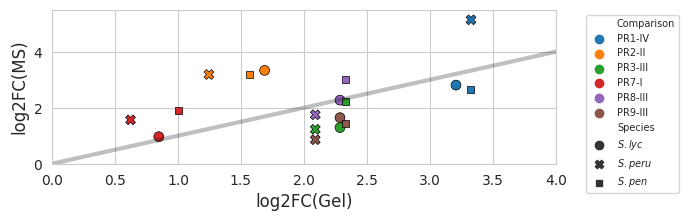

In [84]:
names = ['Comparison', 'PR1-IV', 'PR2-II', 'PR3-III', 'PR7-I', 'PR8-III', 'PR9-III', 'Species', '$\itS.lyc$', '$\itS.peru$', '$\itS.pen$']

fig, axe = plt.subplots(1, 1, figsize=(6.5, 2))

sns.scatterplot(data=sl_corr.append([sr_corr, sn_corr], ignore_index=True), y='ms_increase', x='gel_increase', hue='Comparison', style='Species', s=50, edgecolor='black', linewidth=0.5, ax=axe)

sns.lineplot(x=np.linspace(0, 10, 2), y=np.linspace(0, 10, 2), color='black', alpha=0.25, linewidth=3)

axe.set_ylim(0, 5.5)
axe.set_xlim(0, 4)
axe.set_ylabel('log2FC(MS)', fontsize=12)
axe.set_xlabel('log2FC(Gel)', fontsize=12)

handles, labels = axe.get_legend_handles_labels()
axe.legend(handles, names, ncol=1, loc=2, prop={"size":7}, markerscale=1, bbox_to_anchor=(1.05, 1))

#sns.lineplot(x=x_best, y=y_best)
#sns.jointplot(toms_corr.gel_increase, toms_corr.ms_increase, kind='reg')
#sns.lmplot(x='gel_increase', y='ms_increase', data=toms_corr)

#plt.savefig('/home/felix/thesis/chapter2_tomato_ISs/Results/3_Tomato_ISs/gel_comparison/corrections/Figure8a_report.png', dpi=200, transparent=True, bbox_inches='tight')
plt.show()

In [85]:
slyc_ogs_up = slyc_ogs_log2_comp_change.index.to_numpy()
speru_ogs_up = speru_ogs_log2_comp_change.index.to_numpy()
spen_ogs_up = spen_ogs_log2_comp_change.index.to_numpy()

ogs_up = np.unique(np.concatenate((slyc_ogs_up, speru_ogs_up, spen_ogs_up), 0))

In [86]:
ogs_up

array(['OG0000167', 'OG0000480', 'OG0001159', 'OG0002665', 'OG0003011',
       'OG0003255', 'OG0003427', 'OG0005350', 'OG0005663', 'OG0005896',
       'OG0006236', 'OG0008189', 'OG0008609', 'OG0009032', 'OG0009296',
       'OG0010028', 'OG0010507', 'OG0011318', 'OG0011442', 'OG0011522',
       'OG0011590', 'OG0011969', 'OG0012402', 'OG0012708', 'OG0013080',
       'OG0014115', 'OG0015230', 'OG0017254', 'OG0017613', 'OG0017783',
       'OG0017893', 'OG0017896', 'OG0018341', 'OG0018794', 'OG0019023',
       'OG0019347', 'OG0019831', 'OG0020546', 'OG0022181'], dtype=object)

In [87]:
len(ogs_up)

39

In [88]:
print(len(slyc_ogs_up), len(speru_ogs_up), len(spen_ogs_up))

24 17 14


In [89]:
shared = []
not_sh = []

for og in ogs_up:
    if (og in slyc_ogs_up) & (og in speru_ogs_up) & (og in spen_ogs_up):
        shared.append(og)

    else:
        not_sh.append(og)

# Make bar charts for increasing OGs

new = []

species = ['Sl', 'Sr', 'Sn']
dfs = [slyc_ogs_up, speru_ogs_up, spen_ogs_up]

for spec, df in zip(species, dfs):
    new.append([spec, True, len(shared)])
    new.append([spec, False, len(df)-len(shared)])
      
og_qual_ch = pd.DataFrame(new, columns=['species', 'shared', 'count'])

# Make bar charts for increasing intensities

new = []

species = ['Sl', 'Sr', 'Sn']
dfs = [slyc_ogs_up, speru_ogs_up, spen_ogs_up]
sha = [sl_heat, sr_heat, sn_heat]

for spec, df, tot in zip(species, dfs, sha):
    new.append([spec, True, np.sum(tot[tot.index.isin(shared)].B_mean)])
    new.append([spec, False, np.sum(tot[tot.index.isin(np.setdiff1d(df, shared))].B_mean)])

og_qunt_ch = pd.DataFrame(new, columns=['species', 'shared', 'total_share'])


# Make intensity boxplots of shared OGs

new = []

species = ['sl', 'sr', 'sn']
sha = [sl_heat, sr_heat, sn_heat]
mock = ['M1', 'M2', 'M3', 'M4']
bion = ['B1', 'B2', 'B3', 'B4']

for og in shared:
    for spec, tot in zip(species, sha):
        for trea in mock:
            col = "{}_{}".format(spec, trea)
            new.append([og, spec, 'Mock', col, tot.loc[og, col], tot.loc[og, 'functional_annotation']])

        for trea in bion:
            col = "{}_{}".format(spec, trea)
            new.append([og, spec, 'Bion', col, tot.loc[og, col], tot.loc[og, 'functional_annotation']])

og_shared_ch = pd.DataFrame(new, columns=['orthogroup', 'species', 'treatment', 'replicate', 'total_intensity', 'functional_annotation'])

<ipython-input-96-0535313a0927>:48: UserWarning: FixedFormatter should only be used together with FixedLocator
  counts.set_xticklabels(['$\itS.lycopersicum$', '$\itS.peruvianum$', '$\itS.pennellii$'], fontsize=7)
<ipython-input-96-0535313a0927>:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  shares.set_xticklabels(species_labels, fontsize=7)


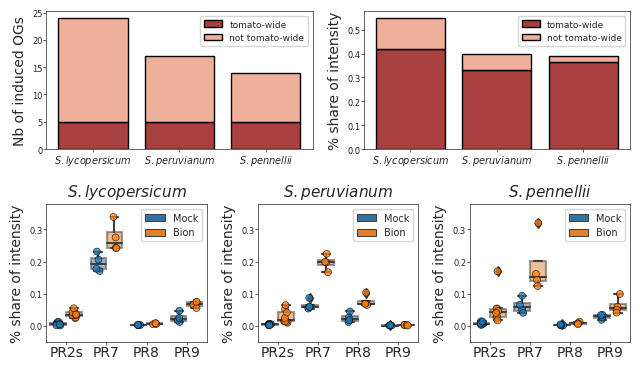

In [96]:
sns.set_style("ticks")

def annotate_axes(axes_list):
    for i, ax in enumerate(axes_list):
        ax.tick_params(axis='both', labelsize=6, pad=0.5)
        # change all spines
        for axis in ['top','bottom','left','right']:
            ax.spines[axis].set_linewidth(0.5)
        ax.xaxis.set_tick_params(width=0.5, length=2)
        ax.yaxis.set_tick_params(which='minor', width=0.25, length=2)
        ax.yaxis.set_tick_params(which='major', width=0.5, length=2)


figure = plt.figure(figsize=(6.5, 3.8))

dims = (2, 6)

counts = plt.subplot2grid(dims, (0, 0), colspan=3)
shares = plt.subplot2grid(dims, (0, 3), colspan=3)

sl_int = plt.subplot2grid(dims, (1, 0), colspan=2)
sr_int = plt.subplot2grid(dims, (1, 2), colspan=2)
sn_int = plt.subplot2grid(dims, (1, 4), colspan=2)

axes = [counts, shares, sl_int, sr_int, sn_int]
share_axes = [sl_int, sr_int, sn_int]
tom_wide = [counts, shares]

annotate_axes(axes)

### Define some arrays ###

species = ['sl', 'sr', 'sn']
species_labels = ['$\itS.lycopersicum$', '$\itS.peruvianum$', '$\itS.pennellii$']
treat_labels = ['Not tomato-wide', 'Tomato-wide']

pr_order = ['PR2', 'PR7', 'PR8', 'PR9']
pr_names = ['PR2s', 'PR7', 'PR8', 'PR9']

### Generate individual plots ###

# Nb of changing OGs

sns.histplot(data=og_qual_ch, x='species', weights='count', hue='shared', multiple='stack', palette=['darksalmon', 'darkred'], shrink=0.8, edgecolor='black', linewidth=1, ax=counts)

counts.set_ylabel('Nb of induced OGs', fontsize=10)
counts.set_xlabel('')
counts.set_xticklabels(['$\itS.lycopersicum$', '$\itS.peruvianum$', '$\itS.pennellii$'], fontsize=7)

# Shares of intensities of OGs

sns.histplot(data=og_qunt_ch, x='species', weights='total_share', hue='shared', multiple='stack', palette=['darksalmon', 'darkred'], shrink=0.8, edgecolor='black', linewidth=1, ax=shares)

shares.set_ylabel('% share of intensity', fontsize=10)
shares.set_xlabel('')
shares.set_xticklabels(species_labels, fontsize=7)

for i in tom_wide:
    i.legend(['tomato-wide', 'not tomato-wide'], ncol=1, loc=1, prop={"size":6.5}, markerscale=0.5)

# Shares of intensity per PR protein and species

for spec, axe in zip(species, share_axes):
    sns.stripplot(data=og_shared_ch[og_shared_ch.species == spec], x='functional_annotation', y='total_intensity', hue='treatment', order=pr_order, dodge=True, alpha=0.75, edgecolor='black', linewidth=0.5, ax=axe)
    sns.boxplot(data=og_shared_ch[og_shared_ch.species == spec], x='functional_annotation', y='total_intensity', hue='treatment', order=pr_order, dodge=True, boxprops={'alpha':0.5}, ax=axe)

for i, spec in zip(share_axes, species_labels):
    i.set_title(spec, fontsize=11)
    i.set_ylim(-0.05, 0.38)
    i.set_ylabel('% share of intensity', fontsize=10)
    i.set_xlabel('')
    i.set_xticklabels(pr_names, fontsize=10)
    handles, labels = i.get_legend_handles_labels()
    i.legend(handles[:2], labels[:2], loc=1, prop={"size":7}, markerscale=0.5)


plt.tight_layout()
#plt.tight_layout(pad=0.75, h_pad=0.001)
#plt.savefig('/home/felix/thesis/chapter2_tomato_ISs/Results/3_Tomato_ISs/corrections/Figure10_update_jupyter.svg', transparent=True)
plt.show()

In [56]:
dfs = [sl_heat, sr_heat, sn_heat]

for df in dfs:
    print(df[df.functional_annotation == 'PR7'].B_mean.to_numpy()[0])


0.2747622310133589
0.19669964401919046
0.186942031082312


In [57]:
sl_pr7 = og_shared_ch[(og_shared_ch.functional_annotation == 'PR7') & (og_shared_ch.treatment == 'Bion') & (og_shared_ch.species == 'sl')].total_intensity.to_numpy()
sr_pr7 = og_shared_ch[(og_shared_ch.functional_annotation == 'PR7') & (og_shared_ch.treatment == 'Bion') & (og_shared_ch.species == 'sr')].total_intensity.to_numpy()
sn_pr7 = og_shared_ch[(og_shared_ch.functional_annotation == 'PR7') & (og_shared_ch.treatment == 'Bion') & (og_shared_ch.species == 'sn')].total_intensity.to_numpy()

In [58]:
p_vals = []

for comp in [[sl_pr7, sr_pr7], [sl_pr7, sn_pr7]]:
    _, p = stats.ttest_ind(comp[0], comp[1], alternative='greater')
    
    p_vals.append(p)

multi.fdrcorrection(p_vals)

(array([ True, False]), array([0.02285676, 0.06663085]))

## Add positive selection information

In [59]:
pos_sel = pd.read_csv('/home/felix/thesis/chapter2_tomato_ISs/Results/4_Positive_selection/pos_selection_pipeline/pos_selection_summary_stats.csv', sep=',', names=['M1_M2', 'M7_M8'], index_col=0)
pos_str = pd.read_csv('/home/felix/thesis/chapter2_tomato_ISs/Results/4_Positive_selection/pos_selection_pipeline/pos_selection_strength.tsv', sep='\t', names=['res_under_sel', 'pos_under_sel', 'omega', 'rho'], skiprows=1, index_col=0)

In [60]:
from scipy.stats import truncnorm

def get_truncated_normal(mean=0, sd=1, low=0, upp=10):
    return truncnorm(
        (low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)



In [65]:
for spec in ['slyc', 'spen', 'speru']:
    m = []
    
    for og in rel_ogs.index:
        prots = rel_ogs.loc[og, spec].split(',')
        if prots[0] != 'empty':
            m.append(len(prots))
        
    print(spec, np.mean(m), np.std(m))

slyc 1.1058823529411765 0.6140229812094065
spen 1.3177083333333333 1.2982756826898858
speru 1.231578947368421 0.8879619666931847


In [66]:
# Identify Solyc locus from Bion-induced OGs

inc_ogs = rel_ogs[rel_ogs.index.isin(ogs_up)]

slyc_found = []
slyc_noHom = []

for i in inc_ogs.index:
    prots = inc_ogs.loc[i, 'slyc'].split(',')
    if prots[0] == 'empty':
        slyc = 0

        if rel_ogs.loc[i, 'speru'].split(',')[0] == 'empty':
            sper = 0
        else:
            sper = 1
            
        if rel_ogs.loc[i, 'spen'].split(',')[0] == 'empty':
            spen = 0
        else:
            spen = 1
            
        
        wild_prots = ogs.loc[i, 'Slyc'].split(',')
        wild_prots = [x.replace(' ', '') for x in wild_prots]
        

        if wild_prots[0] == 'empty':
            slyc_noHom.append(i)
            
        else:
            for wild_prot in wild_prots:
                slyc_found.append([wild_prot, slyc, sper, spen])
                
    else:
        slyc = 1
     
        if rel_ogs.loc[i, 'speru'].split(',')[0] == 'empty':
            sper = 0
        else:
            sper = 1
            
        if rel_ogs.loc[i, 'spen'].split(',')[0] == 'empty':
            spen = 0
        else:
            spen = 1
            
            

        for prot in prots:
            slyc_found.append([prot, slyc, sper, spen])
check_posSel = pd.DataFrame(slyc_found, columns=['protein_id', 'slyc_found', 'sper_found', 'spen_found'])

pos_sel_sub = pos_sel[pos_sel.index.isin(check_posSel.protein_id)]
pos_sel_sub = ms.fdr_correction(pos_sel_sub, 'M7_M8')
pos_sel_sub[pos_sel_sub.fdr_bh_correction_M7_M8 == True]

,M1_M2,M7_M8,fdr_bh_correction_M7_M8
Solyc01g105070.3.1,1.835668e-03,7.379778e-06,True
Solyc02g022850.1.1,6.934238e-02,1.596178e-02,True
Solyc02g064940.1.1,1.567786e-02,3.068867e-03,True
Solyc02g077040.4.1,2.910844e-10,1.598048e-10,True
Solyc02g082920.4.1,2.350818e-02,1.255407e-02,True
Solyc03g020030.3.1,1.155260e-04,1.352172e-05,True
Solyc03g034338.1.1,1.939521e-03,1.362252e-04,True
Solyc03g044160.3.1,5.103322e-08,5.107427e-08,True
Solyc03g082920.4.1,7.296279e-05,6.798933e-07,True
Solyc04g072860.3.1,1.416022e-02,1.825155e-02,True


In [ ]:
ogs = ['Solyc06g083020.3.1', 'Solyc02g077040.4.1', '']

In [62]:
X = get_truncated_normal(mean=0.5, sd=0.2, low=0, upp=1)
random = X.rvs(19135-51)
random

array([0.37723126, 0.29214613, 0.42944589, ..., 0.0235362 , 0.38029232,
       0.1557223 ])

In [184]:
res = multi.fdrcorrection(full, alpha=0.01)
res[0][:51]

array([False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False])

In [185]:
5/51

0.09803921568627451

In [138]:
multi.fdrcorrection(new)

(array([False, False, False, ..., False, False, False]),
 array([1.     , 0.05015, 1.     , ..., 1.     , 1.     , 1.     ]))

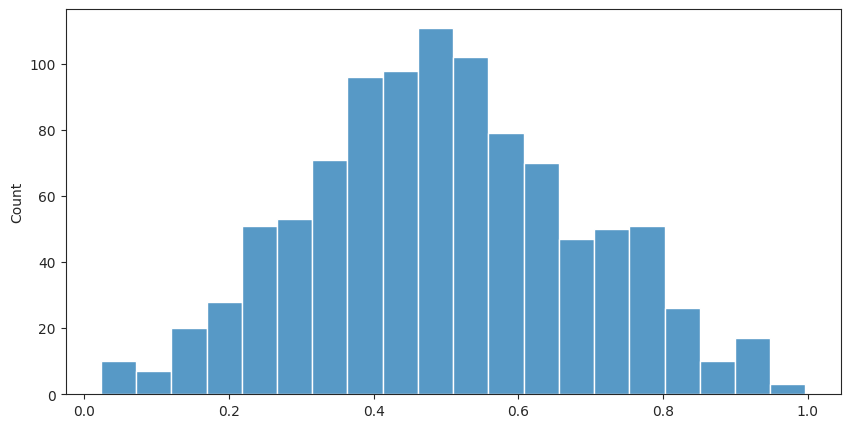

In [133]:
plt.figure(figsize=(10, 5))

sns.histplot(b)

plt.show()

In [183]:
21/51

0.4117647058823529

In [75]:
pos_sel_sub[pos_sel_sub.fdr_bh_correction_M7_M8 == True]

,M1_M2,M7_M8,fdr_bh_correction_M7_M8
Solyc01g105070.3.1,1.835668e-03,7.379778e-06,True
Solyc02g022850.1.1,6.934238e-02,1.596178e-02,True
Solyc02g064940.1.1,1.567786e-02,3.068867e-03,True
Solyc02g077040.4.1,2.910844e-10,1.598048e-10,True
Solyc02g082920.4.1,2.350818e-02,1.255407e-02,True
Solyc03g020030.3.1,1.155260e-04,1.352172e-05,True
Solyc03g034338.1.1,1.939521e-03,1.362252e-04,True
Solyc03g044160.3.1,5.103322e-08,5.107427e-08,True
Solyc03g082920.4.1,7.296279e-05,6.798933e-07,True
Solyc04g072860.3.1,1.416022e-02,1.825155e-02,True


In [64]:
pos_sel

,M1_M2,M7_M8
Solyc01g005985.1.1,1.000000e+00,9.956863e-01
Solyc01g006290.4.1,1.000000e+00,6.540562e-01
Solyc01g006300.3.1,9.927593e-01,7.120480e-01
Solyc01g006310.3.1,1.798986e-01,1.082125e-01
Solyc01g006660.3.1,1.172357e-11,3.553763e-12
...,...,...
Solyc12g098225.1.1,9.352444e-08,8.239394e-08
Solyc12g098810.2.1,4.082086e-01,8.886082e-02
Solyc12g099160.2.1,7.603328e-01,5.879173e-01
Solyc12g099990.2.1,9.872332e-01,9.664865e-01


## Overview of Orthogroups

## Generate overview of OGs and ISs

In [42]:
ms.tomatoes_ogs_overview(slyc_ogs_log2_comp, 'slyc', 'Slyc', rel_ogs, ogs)

['Slyc', 28, 127, 146, 24]

In [45]:
new = []
new.append(ms.tomatoes_ogs_overview(slyc_ogs_log2_comp, 'slyc', 'Slyc', rel_ogs, ogs))
new.append(ms.tomatoes_ogs_overview(speru_ogs_log2_comp, 'speru', 'Speru', rel_ogs, ogs))
new.append(ms.tomatoes_ogs_overview(spen_ogs_log2_comp, 'spen', 'Spen', rel_ogs, ogs))
toms_ogs_bar = pd.DataFrame(new, columns=['species', 'total_not_proteome', 'total_not_MS', 'total_no_change', 'total_up'])
toms_ogs_bar = toms_ogs_bar.set_index(toms_ogs_bar['species'])
toms_ogs_bar.drop(columns=['species'], inplace=True)

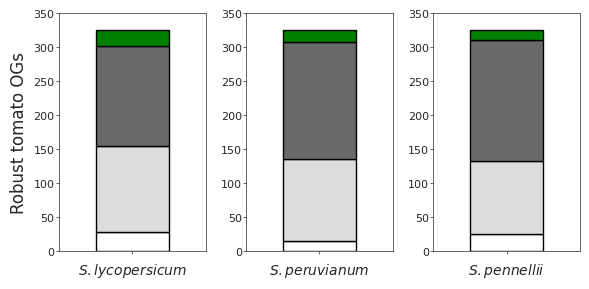

In [49]:
sns.set_style("ticks")

def annotate_axes(axes_list):
    for i, ax in enumerate(axes_list):
        ax.tick_params(axis='both', labelsize=8, pad=0.5)
        # change all spines
        for axis in ['top','bottom','left','right']:
            ax.spines[axis].set_linewidth(0.5)
        ax.xaxis.set_tick_params(width=0.5, length=2)
        ax.yaxis.set_tick_params(which='minor', width=0.25, length=2)
        ax.yaxis.set_tick_params(which='major', width=0.5, length=2)


figure = plt.figure(figsize=(6, 3))

lyc = plt.subplot2grid((1, 3), (0, 0))
per = plt.subplot2grid((1, 3), (0, 1))
pen = plt.subplot2grid((1, 3), (0, 2))

#hea = plt.subplot2grid((3, 3), (0, 0), rowspan=3, colspan=2)
#lyc = plt.subplot2grid((3, 3), (0, 2))
#per = plt.subplot2grid((3, 3), (1, 2))
#pen = plt.subplot2grid((3, 3), (2, 2))



axes = [lyc, per, pen]
annotate_axes(axes)

### Define some arrays ###

species = ['Slyc', 'Speru', 'Spen']
labels = ['$\itS.lycopersicum$', '$\itS.peruvianum$', '$\itS.pennellii$']
legend_labels = ['Not in Proteome', 'Not in MS', 'Down', 'Unchanged', 'Up']


### Generate individual plots ###

for spec, axe in zip(species, axes):    
    toms_ogs_bar[toms_ogs_bar.index == spec].plot(kind='bar', stacked=True, color=['white', 'gainsboro', 'dimgray', 'green'], legend=False, edgecolor='black', linewidth=1, ax=axe)

for i, lab in zip(axes, labels):
    i.set_ylim(0, 350)
    i.set_xlabel(lab, fontsize=10)
    i.set_xticklabels('')
    i.tick_params(axis='x', labelsize=10, pad=1)
    i.tick_params(axis='y', labelsize=8, pad=1)
    
lyc.set_ylabel('Robust tomato OGs', fontsize=12)
#per.set_yticklabels('')
#pen.set_yticklabels('')
#handles, labels = lyc.get_legend_handles_labels()
#pen.legend(handles, legend_labels, ncol=5, loc=1, prop={"size":7}, markerscale=0.5)



plt.tight_layout()
#plt.tight_layout(pad=0.75, h_pad=0.001)
#plt.savefig('/home/felix/thesis/chapter2_tomato_ISs/Results/3_Tomato_ISs/FigureX_jupyter.svg', transparent=False)
plt.show()